In [234]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA
import cvxpy as cvx
from scipy import stats, misc
import numpy.matlib

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

(-0.1, 1.1)

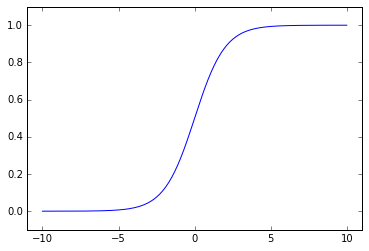

In [235]:
z = [x/10. for x in range(-100, 101)]
z = np.array(z)
s = 1./(1+np.exp(-z))
plt.plot(z, s)
plt.xlim([-11, 11])
plt.ylim([-0.1, 1.1])

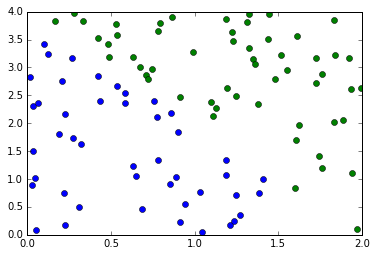

In [455]:
m = 100
w = np.array([[2], [1], [-4]])

X = np.concatenate(((2*np.random.rand(m, 1)),(4*np.random.rand(m, 1)) ,np.ones((m, 1))), axis = 1 )
y = 0.5 < (np.exp(X.dot(w))/(1+np.exp(X.dot(w))))
y = y.astype(float)
c1 = np.where(y == 1)[0]
c2 = np.where(y == 0)[0]
y[c2] = -1
plt.plot(X[c1, 0], X[c1, 1], 'go', X[c2, 0], X[c2, 1], 'bo')
plt.show()

In [456]:
y = np.matrix(y)
X = np.matrix(X)
w = cvx.Variable(3)
expr2 = [cvx.log_sum_exp(cvx.vstack(0, y[i]*X[i,:]*w)) for i in range(m)]
expr3 = sum(expr2)
obj = cvx.Minimize(expr3)
prob = cvx.Problem(obj)
prob.solve()


2.1665302240472074e-05

In [457]:
w.value

matrix([[-304.93938784],
        [-146.72772407],
        [ 597.53338802]])

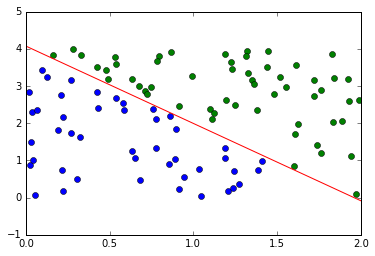

In [458]:
wsol = np.asarray(w.value)
xp = [x/10. for x in range(0, 21)]
yp = (-wsol[0]*xp - wsol[2])/wsol[1]
plt.plot(X[c1, 0], X[c1, 1], 'go', X[c2, 0], X[c2, 1], 'bo')
plt.plot(xp,yp,'r')
plt.show()

In [462]:
y = np.matrix(y)
X = np.matrix(X)
w = cvx.Variable(3)
g = 1;
expr2 = [cvx.log_sum_exp(cvx.vstack(0, y[i]*X[i,:]*w)) for i in range(m)]
expr3 = sum(expr2)
obj = cvx.Minimize(g*cvx.norm2(w)+expr3)
prob = cvx.Problem(obj)
prob.solve()


23.4699878235756

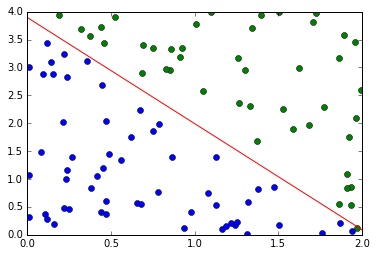

In [463]:
wsol = np.asarray(w.value)
xp = [x/10. for x in range(0, 21)]
yp = (-wsol[0]*xp - wsol[2])/wsol[1]
plt.plot(X[c1, 0], X[c1, 1], 'go', X[c2, 0], X[c2, 1], 'bo')
plt.plot(xp,yp,'r')
plt.show()

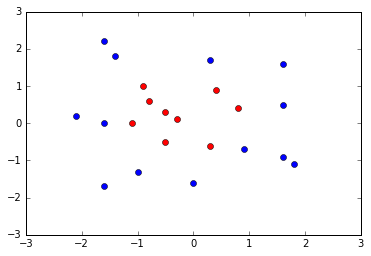

In [464]:
x_c1 = np.array([[-1.1,  0], [-0.3,  0.1], [-0.9,  1],[0.8,  0.4],[0.4,  0.9],[0.3,-0.6],[-0.5, 0.3],
        [-0.8,  0.6],[-0.5, -0.5]])
     
x_c2 = np.array([[-1,  -1.3], [-1.6 , 2.2],  [0.9, -0.7],[1.6,  0.5],[1.8, -1.1],[1.6,  1.6],[-1.6, -1.7],
[-1.4,  1.8],[1.6, -0.9],[0, -1.6],[0.3, 1.7],[-1.6 , 0],[-2.1,0.2]])

plt.plot(x_c1[:, 0], x_c1[:,1], 'ro')
plt.plot(x_c2[:, 0], x_c2[:,1], 'bo')
plt.axis([-3,3,-3,3])
plt.show()


In [468]:
c1n = x_c1.shape[0]
c2n = x_c2.shape[0]

X = np.concatenate((x_c1, x_c2), 0)
y = np.concatenate((np.ones((c1n, 1)), -np.ones((c2n, 1))), 0)


n = 3
m = c1n + c2n
g = 1

z = np.zeros((m, 6))

z[:, 0] = np.ones((m, ))
z[:, 1] = np.sqrt(2)*X[:, 0]
z[:, 2] = np.sqrt(2)*X[:, 1]
z[:, 3] = X[:, 0]**2
z[:, 4] = np.sqrt(2)*X[:, 0]*X[:, 1]
z[:, 5] = X[:, 1]**2

w = cvx.Variable(n, 1)




y = np.matrix(y)
X = np.matrix(X)
w = cvx.Variable(6)
g = 1;
expr2 = [cvx.log_sum_exp(cvx.vstack(0, y[i]*z[i,:]*w)) for i in range(m)]
expr3 = sum(expr2)
obj = cvx.Minimize(g*cvx.norm2(w)+expr3)
prob = cvx.Problem(obj)
prob.solve()

wsol = np.asarray(w.value)



In [470]:
wsolnormal = wsol/LA.norm(wsol)*10
wsolnormal

array([[-6.91671162],
       [ 1.34014601],
       [-2.02552631],
       [ 4.84577749],
       [ 0.39788637],
       [ 4.75609915]])

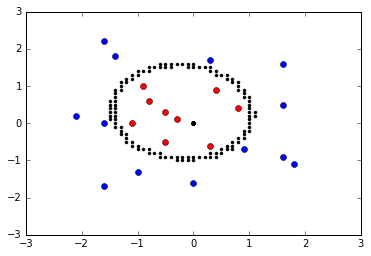

In [479]:
[X1g, X2g] = np.meshgrid([x1/10. for x1 in range(-30,31,1)],[x2/10. for x2 in range(-30,31,1)])

x_test = np.concatenate((X1g.reshape(X1g.shape[0]**2,1, order ="F"), X2g.reshape(X2g.shape[0]**2,1, order = "F")), 1)
mtest = np.shape(x_test)[0]

z_test = np.zeros((mtest, 6))

z_test[:, 0] = np.ones((mtest, ))
z_test[:, 1] = np.sqrt(2)*x_test[:, 0]
z_test[:, 2] = np.sqrt(2)*x_test[:, 1]
z_test[:, 3] = x_test[:, 0]**2
z_test[:, 4] = np.sqrt(2)*x_test[:, 0]*x_test[:, 1]
z_test[:, 5] = x_test[:, 1]**2

y_hat = 1/(1+np.exp(-z_test.dot(wsolnormal)))

B = np.zeros((np.shape(y_hat)[0],2))

for i in range(0, y_hat.shape[0]):
    if np.abs(y_hat[i]-0.5) < 0.2: 
        B[i,:] = x_test[i,:]

plt.plot(x_c1[:, 0], x_c1[:,1], 'ro')
plt.plot(x_c2[:, 0], x_c2[:,1], 'bo')
plt.axis([-3,3,-3,3])
plt.plot(B[:, 0], B[:, 1], 'k.')
plt.show()